# Анализ источников рекламного трафика 

# Задачи:

- как клиенты пользуются сервисом,
- когда делают первые покупки на сайте,
- сколько денег приносит компании каждый клиент,
- когда расходы на привлечение клиента окупаются.

# Аббревиатуры:

## Структура visits_log.csv:

- Uid — уникальный идентификатор пользователя,
- Device — категория устройства пользователя,
- Start Ts — дата и время начала сессии,
- End Ts — дата и время окончания сессии,
- Source Id — идентификатор источника перехода на сайт.

## Структура orders_log.csv:

- Uid — уникальный идентификатор пользователя,
- Buy Ts — дата и время заказа,
- Revenue — сумма заказа.

## Структура costs.csv:
- source_id — идентификатор рекламного источника,
- dt — дата проведения рекламной кампании,
- costs — расходы на эту кампанию.

# Оглавление:

[Шаг 1: Загрузить данные и подготовить их к анализу](#one)

[Шаг 2: Рассчитать метрики и построить графики](#two)

[Шаг 2.1. Продуктовые метрики](#six)

[Шаг 2.2. Метрики электронной коммерции](#seven)

[Шаг 2.3. Маркетинговые метрики](#eight)

[Шаг 3. Сформулировать выводы и рекомендации](#three)

[Вниз](#four)<a id= 'five'></a>

<a id= 'one'></a>
# Шаг 1. Загрузить данные и подготовить их к анализу

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
display(visits)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null datetime64[ns]
Source Id    359400 non-null int64
Start Ts     359400 non-null datetime64[ns]
Uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [6]:
orders = pd.read_csv('/datasets/orders_log.csv')
display(orders)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [8]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null datetime64[ns]
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [10]:
costs = pd.read_csv('/datasets/costs.csv')
display(costs)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [11]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [12]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [13]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


# Вывод: Шаг 1
Сохранил данные в переменные, проверил их на наличие пропусков и других ошибок. Обнаружил, что дата находится не в правильном формате, и в таком формате будет затруднительно анализировать. Таким образом, я принял решение заменить тип данных с object в datetime.

<a id= 'two'></a>
# Шаг 2. Рассчитать метрики и построить графики

<a id= 'six'></a>
<h1> 2.1. Продуктовые метрики 

# 2.1.1 WAU, MAU, DAU

In [14]:
visits['start_year'] = visits['Start Ts'].dt.year
visits['start_month'] = visits['Start Ts'].dt.month
visits['start_week'] = visits['Start Ts'].dt.week
visits['start_date'] = visits['Start Ts'].astype('datetime64[D]')
visits['start_date_month'] = visits['Start Ts'].astype('datetime64[M]')
visits['start_date_week'] = visits['Start Ts'].astype('datetime64[W]')

Срднее MAU = 23228.00


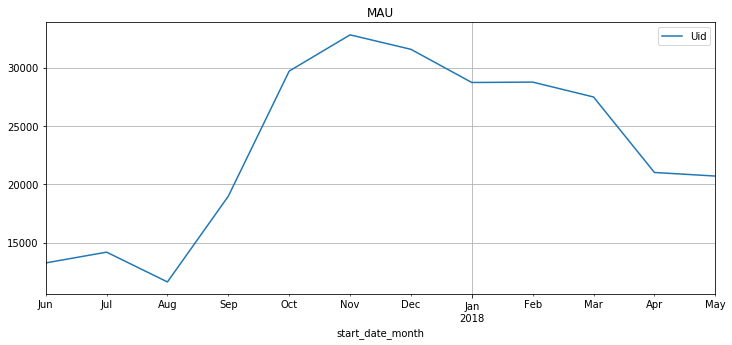

In [15]:
mau = visits.groupby(['start_year', 'start_date_month']).agg({'Uid' : 'nunique'}).reset_index()
print('Срднее MAU = {:.2f}'.format(int(mau['Uid'].mean().round())))
mau.plot.line(x = 'start_date_month', y = 'Uid', title = 'MAU', figsize = (12, 5), grid = True)

Срднее WAU = 5622.00


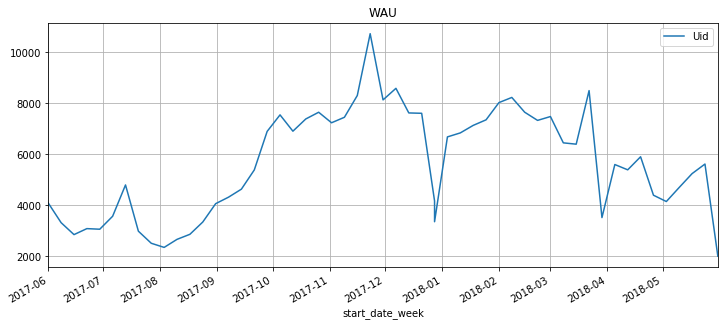

In [16]:
wau = visits.groupby(['start_year', 'start_date_week']).agg({'Uid' : 'nunique'}).reset_index()
print('Срднее WAU = {:.2f}'.format(int(wau['Uid'].mean().round())))
wau.plot.line(x = 'start_date_week', y = 'Uid', title = 'WAU', figsize = (12, 5), grid = True)

Срднее DAU = 908.00


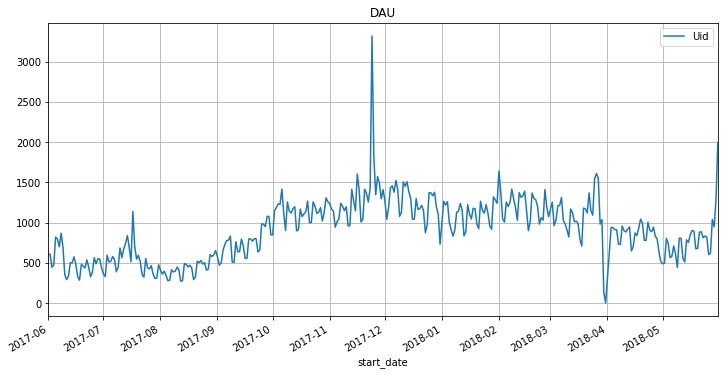

In [17]:
dau = visits.groupby(['start_year', 'start_date']).agg({'Uid' : 'nunique'}).reset_index()
print('Срднее DAU = {:.2f}'.format(int(dau['Uid'].mean().round())))
dau.plot.line(x = 'start_date', y = 'Uid', title = 'DAU', figsize = (12, 6), grid = True)

На графиках, хорошо видны скачки посещаемости к зиме, и спад к лету. Все это можно объяснить, что театры летом на каникулах, и впринципе громкие новинки выходят ближе к новому году

# Количество пользователей в зависимости от часа дня

In [18]:
daily_visits = visits.groupby(['Uid']).agg({'start_date' : 'count'})
display(int(daily_visits.mean().round()))


2

In [19]:
visits['start_hour'] = visits['Start Ts'].dt.hour

In [20]:
daily_visits_hours = visits.groupby(['start_hour']).agg({'Uid' : 'count'}).reset_index()

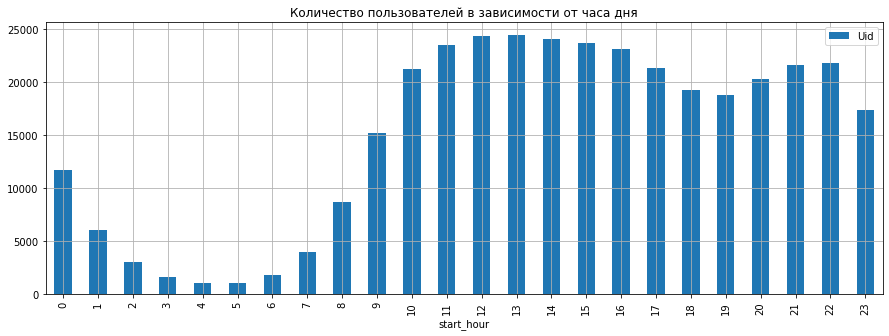

In [21]:
daily_visits_hours.plot(x = 'start_hour', y = 'Uid', kind = 'bar', title = 'Количество пользователей в зависимости от часа дня', figsize = (15, 5), grid = True)


Решил оставить все выше, так как и правда получились интересные результаты. Пики как раз в 12 часов, примерно в обеденый перерыв. Моя гипотеза была, что пик будет с 17.00 по 19.00. Так как у мнгоих заканчивается работа, учеба в это время. А оказалось, наоборот, что в это время просадок и наверное в это время люди спешат домой. Смотрят они как раз таки или на работе, или уже после ужина в 22.00.

# 2.1.2  Cколько раз за день пользователи в среднем заходят на сайт

In [22]:
sessions_per_day = visits.groupby(['start_year', 'start_date_month', 'start_date']).agg({'Uid' : ['count', 'nunique']})
sessions_per_day.columns = ['n_sessions', 'n_users']
sessions_per_day['sessions_per_user'] = sessions_per_day['n_sessions'] / sessions_per_day['n_users']
sessions_per_day = sessions_per_day.reset_index()

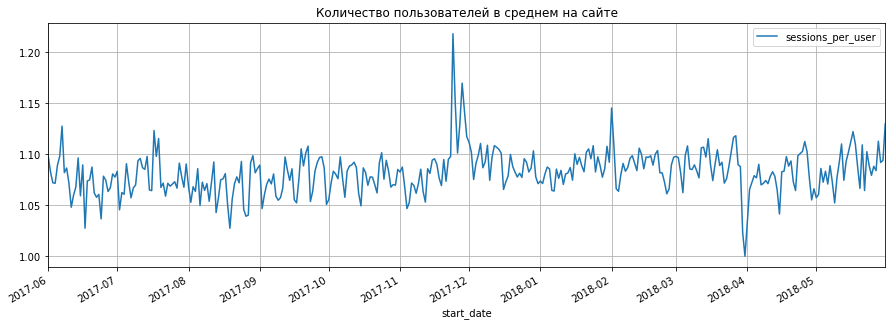

In [23]:
sessions_per_day.plot(x = 'start_date', y = 'sessions_per_user', title = 'Количество пользователей в среднем на сайте', figsize = (15, 5), grid = True)

In [24]:
print('Количество пользователей в среднем на сайте = {:.2f}'.format(sessions_per_day['sessions_per_user'].mean()))

Количество пользователей в среднем на сайте = 1.08


В среднем прослеживается, такой же тренд как и выше. Пользователи чаще возвращаются на сайт зимой, а просадок происходит летом.

# 2.1.3. Сколько времени пользователи проводят на сайте

In [25]:
import warnings
warnings.filterwarnings('ignore')
visits['time_delta'] = visits['End Ts'] - visits['Start Ts']
visits['time_delta'] = pd.to_datetime(visits['time_delta'])
visits['time_delta'] = visits['time_delta'].dt.minute


In [91]:
visits.head()

,Device,End Ts,source_id,Start Ts,Uid,start_year,start_month,start_week,start_date,start_date_month,start_date_week,start_hour,time_delta,first_activity_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,2017-12-01,2017-12-14,17,18,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,2018-02-01,2018-02-15,16,28,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,2017-07-01,2017-06-29,1,0,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,2018-05-01,2018-05-17,10,24,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,2017-12-01,2017-12-21,14,0,2017-12-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,30,2017-07-29,2017-07-01,2017-07-27,19,0,2017-07-01,0
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,4,2018-01-25,2018-01-01,2018-01-25,17,0,2018-01-01,0
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,9,2018-03-03,2018-03-01,2018-03-01,10,0,2018-03-01,0
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,44,2017-11-02,2017-11-01,2017-11-02,10,0,2017-11-01,0


In [26]:
time_spent = visits.groupby('time_delta').agg({'Uid' : 'count'}).reset_index()
display(visits['time_delta'].median())
#visits['minutes_spent'] = visits['time_delta'].dt.minute


5.0

Выбросов очень много, а медиана не подвержена выбросам. Таким образом, можно увидеть более точный ответ, чем использование средней.

In [27]:
display(time_spent.head(30))
display(time_spent.max())

,time_delta,Uid
0,0,36978
1,1,53319
2,2,35995
3,3,26923
4,4,21348
5,5,17245
6,6,14519
7,7,12532
8,8,11184
9,9,9930


time_delta       59
Uid           53319
dtype: int64

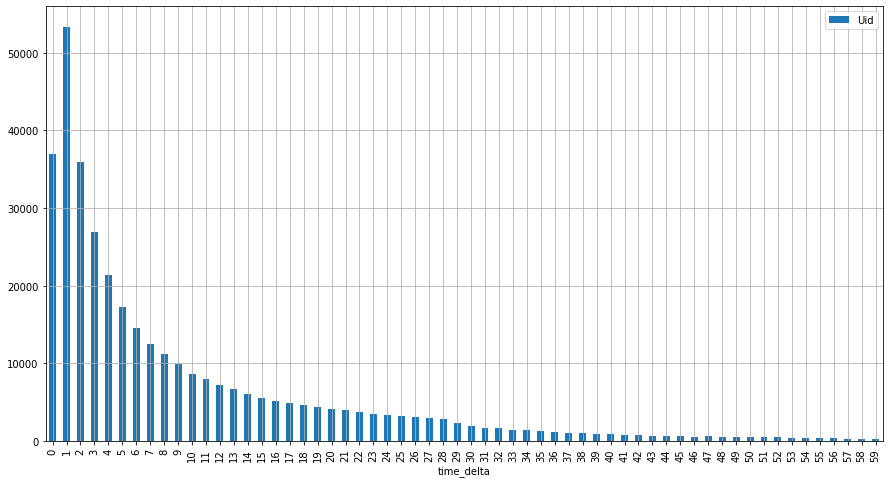

In [28]:
time_spent.plot(y = 'Uid', x = 'time_delta', kind = 'bar', figsize = (15, 8), grid = 'True')

Сравнивая график и медиану, очевидно, что большое количество выбросов. Нужно понять, успевают лт люди за минуту проверить, что ему надо или тут техническая проблема. Выбросов с 0 минут, тоже много, может проблема с API?

# 2.1.4. Рассчитать Retention Rate, применяя когортный анализ.

In [29]:
first_activity_date = visits.groupby(['Uid'])['Start Ts'].min().astype('datetime64[M]')
first_activity_date.name = 'first_activity_month'
#first_activity_date['first_activity_month'] = first_activity_date['first_activity_month'].astype('datetime64[M]')
visits = visits.join(first_activity_date, on = 'Uid')

In [1]:
visits.head()

NameError: name 'visits' is not defined

In [31]:
visits['cohort_lifetime'] = (visits['start_date_month'] - visits['first_activity_month'])
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

In [32]:
cohorts = visits.groupby(['first_activity_month','cohort_lifetime']).agg({'Uid':'nunique'}).reset_index()

initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month', 'Uid']]

In [33]:
initial_users_count = initial_users_count.rename(columns={'Uid':'cohort_users'}) 
cohorts = cohorts.merge(initial_users_count,on='first_activity_month')
cohorts['retention'] = cohorts['Uid']/cohorts['cohort_users'] 
cohorts['first_activity_month'] = cohorts['first_activity_month'].dt.strftime('%Y-%m')
retention_pivot = cohorts.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='mean',
) 

In [34]:
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
retention_pivot = retention_pivot.drop(columns = [0])

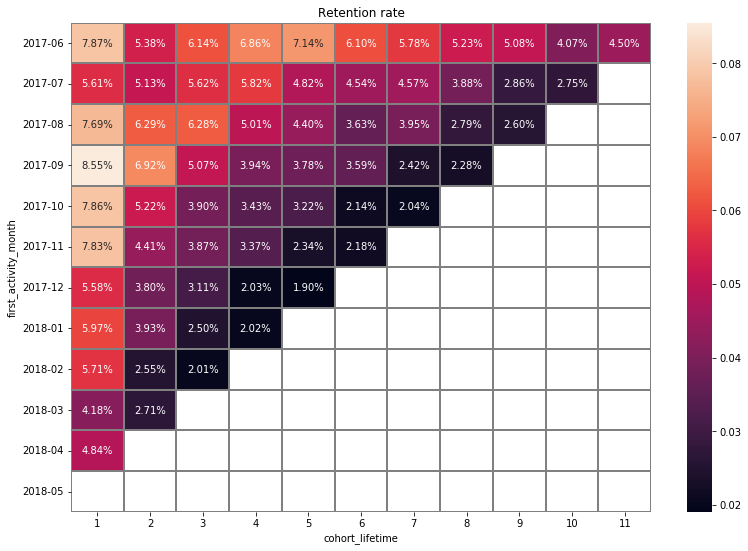

In [36]:
plt.figure(figsize = (13, 9))
plt.title('Retention rate')
sns.heatmap(retention_pivot, annot = True, fmt = '.2%', linewidths = 1, linecolor = 'gray')
plt.show()

Коэффициент удержание со временем падает.

In [37]:
retention_2m = retention_pivot[1].mean()
print('Средний Retention Rate на второй месяц: {:.2%}'.format(retention_2m))

Средний Retention Rate на второй месяц: 6.52%


# Вывод 

В первом шаге можно было явно наблюдать, что активность использования приложения происходит начиная с осени, достигает пика к зиме и начинает спадать ближе к лету. Показатели WAU, DAU, MAU летом самые низкие, могу предположить, что летом театры уходят на летние каникулы, и премьеры фильмов происходят реже. Так же, многие люди уезжают на отдых в другую страну или в деревню, где нет смысла использовать Яндекс.Афишу.
По поводу времени использования приложения, крайне отчётливо видно, что в статистике большое количество выбросов, так как большое количество пользователей проводят на сайте меньше одной минуты. Предположу, что люди заходят или случайно, или проверить, если есть какие-нибудь новинки. Основываясь на своем опыте, примерно одной минуты на это хватит, но чтоб на столько массово? Также много пользователей которые проводят, 20 минут и более, что так же выглядит странно, и маловероятно. В этом случае уже вина самой программы, нужно проверить разработчикам приложение на всякий случай. Таким образом, для подсчета среднего времени использования Яндекс.Афиша я использовал медиану, что составила 5 минут. Считаю, что это реалистичное время.
Далее, был посчитан коэффициент удержания, из тепловой карты наглядно видно, что он достигает до 9%, таким образом приложения не очень нравится людям, и мало людей с охотой возвращаются обратно.

Интересно, что когорты, которые начали пользоваться летом чаще возвращаются, нежели люди с осенних и зимних когорт. На второй месяц жизни когорты, возвращается примерно 6.52% пользователей.

<a id= 'seven'></a>
# 2.2. Метрики электронной коммерции

# 2.2.1. Исследовать, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки.

In [38]:
first_order = orders.groupby('Uid')['Buy Ts'].min().reset_index()
first_visit =  visits.groupby(['Uid'])['Start Ts'].min().reset_index()

first_order_date = first_order.merge(first_visit, on='Uid')

first_order_date = first_order_date.rename(columns ={'Buy Ts': 'first_order_date', 'Start Ts': 'first_visit_date'})

first_order_date

,Uid,first_order_date,first_visit_date
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00
...,...,...,...
36518,18445147675727495770,2017-11-24 09:03:00,2017-08-20 13:30:00
36519,18445407535914413204,2017-09-22 23:55:00,2017-09-22 23:48:00
36520,18445601152732270159,2018-03-26 22:54:00,2017-08-07 11:51:00
36521,18446156210226471712,2018-02-18 19:34:00,2017-11-07 10:01:00


In [39]:
first_order_date['time_delta'] = first_order_date['first_order_date'] - first_order_date['first_visit_date']

In [40]:
first_order_date['time_delta'] = first_order_date['time_delta'] / np.timedelta64(1, 'D')
first_order_date['time_delta'] = first_order_date['time_delta'].round().astype('int')

In [41]:
first_order_date

,Uid,first_order_date,first_visit_date,time_delta
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,107
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,0
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,1
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0
...,...,...,...,...
36518,18445147675727495770,2017-11-24 09:03:00,2017-08-20 13:30:00,96
36519,18445407535914413204,2017-09-22 23:55:00,2017-09-22 23:48:00,0
36520,18445601152732270159,2018-03-26 22:54:00,2017-08-07 11:51:00,231
36521,18446156210226471712,2018-02-18 19:34:00,2017-11-07 10:01:00,103


В столбце 0 означает, что покупка было совершена в тот же день 

In [42]:
print("В среднем люди совершают покупки через: {:.0f} дней".format(first_order_date['time_delta'].mean().round()))



В среднем люди совершают покупки через: 17 дней


In [43]:
print("Медиана людей совершают покупки через: {:.0f} дней".format(first_order_date['time_delta'].median().round()))

Медиана людей совершают покупки через: 0 дней


Другими словами, метрика регистрирует первый визит на сайт уже во время совершения покупки

# Вывод

Если считать при помощи средней, то для совершение покупок необходимо 17 дней. Этот метод может быть не совсем точный, так как в данных много выбросов и это влияет на результат. Если использовать медиану, то это более точный результат, на нее не влияют выбросы. В этом случае, в среднем люди при первом использовании этим приложением сразу же оформляют покупку. Это не удевительно, так как в основом Яндекс.Афиша используется для приобритения билетов.

# 2.2.2. Применяя когортный анализ или другой метод, рассчитать среднее количество покупок на одного покупателя за 6 месяцев

In [44]:
orders['order_month'] = orders['Buy Ts'].astype('datetime64[M]')
first_orders = orders.groupby('Uid').agg({'order_month':'min'}).reset_index()
first_orders.columns = ['Uid', 'first_order_month']

In [45]:
cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'Uid': 'nunique'})
    .reset_index()
)

In [46]:
cohort_sizes.columns = ['first_order_month', 'n_buyers']
orders_first_month = pd.merge(orders, first_orders, on ='Uid')
cohorts = orders_first_month.groupby(['first_order_month', 'order_month']).agg({'Uid': 'count'}).reset_index()

In [47]:
report = pd.merge(cohort_sizes, cohorts, on = 'first_order_month')
report['age'] = (report['order_month'] - report['first_order_month'])/np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['n_buy'] = report['Uid'] / report['n_buyers']

In [48]:
purchase = report.pivot_table(index = 'first_order_month', columns = 'age', values = 'n_buy', aggfunc = 'mean')

In [49]:
purchase = purchase.cumsum(axis = 1)

In [50]:
purchase

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.163618,1.251112,1.337123,1.448838,1.593178,1.700939,1.837370,1.923381,2.028176,2.103806,2.151261,2.193772
2017-07-01,1.136765,1.188768,1.251170,1.305252,1.342694,1.385335,1.417057,1.443058,1.473219,1.485699,1.513261,NaN
2017-08-01,1.118978,1.197810,1.270803,1.329927,1.391971,1.437226,1.472993,1.529927,1.563504,1.597080,NaN,NaN
2017-09-01,1.136381,1.221232,1.283611,1.347152,1.373111,1.415343,1.457187,1.478884,1.502518,NaN,NaN,NaN
2017-10-01,1.143779,1.216129,1.253456,1.281567,1.311290,1.335023,1.354839,1.383641,NaN,NaN,NaN,NaN
2017-11-01,1.179368,1.276648,1.321245,1.372948,1.406273,1.420730,1.445724,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.152635,1.214237,1.260324,1.301164,1.320785,1.344741,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.121554,1.187963,1.235102,1.254076,1.277201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.121611,1.182416,1.205149,1.224322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
result_6m = purchase.mean(axis = 0)[5]
print('В среднем пользователь на шестой месяц жизни делает {:.2f} покупок'.format(result_6m))

В среднем пользователь на шестой месяц жизни делает 1.43 покупок


# Вывод

На шестой месяц совершается примерно 1.43 покупок или чуть больше одной покупки. Можно увидеть тренд, что частота покупок со временем увеличивается.

# 2.2.3. Рассчитать средний чек, применяя группировку по времени совершения покупки

In [52]:
orders['Buy Ts'] = orders['Buy Ts'].astype('datetime64[M]')
#orders['purchase_month'] = orders['Buy Ts'].dt.month

In [53]:
mean_check = orders.groupby('Buy Ts').agg({'Revenue' : 'mean'}).reset_index()
mean_check

,Buy Ts,Revenue
0,2017-06-01,4.060106
1,2017-07-01,5.306589
2,2017-08-01,4.847139
3,2017-09-01,5.416448
4,2017-10-01,4.928280
5,2017-11-01,4.783518
6,2017-12-01,5.852139
7,2018-01-01,4.112927
8,2018-02-01,4.840095
9,2018-03-01,5.413930


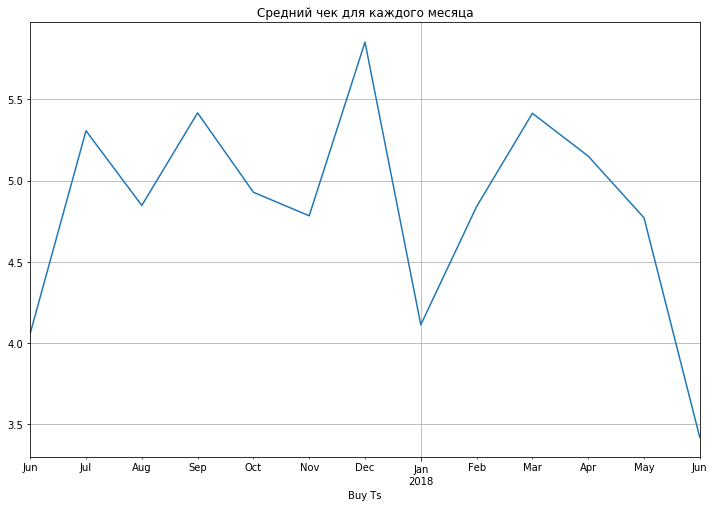

In [54]:
mean_check.plot(x = 'Buy Ts', y = 'Revenue', kind='line', figsize=(12,8), grid = True, title = 'Cредний чек для каждого месяца', legend = False)

In [55]:
mean_check['Revenue'].describe()

count    13.000000
mean      4.838700
std       0.656336
min       3.420000
25%       4.771279
50%       4.847139
75%       5.306589
max       5.852139
Name: Revenue, dtype: float64

# Вывод

На графике, хорошо видно, что примерно средний чек не изменятеся,но так же проглядывается тренд, что к зиме чек увеличивается а к июню он уменьшается, но с июля средний чек начинает расти. А так, средний чек состовляет около 5.

# 2.2.4. Выяснить, как меняется LTV на покупателя по когортам

In [56]:
orders = orders.merge(orders.groupby('Uid').agg({'order_month': 'min'}).rename(columns = {'order_month': 'first_order_month'}).reset_index(), on = 'Uid', how = 'left')

In [57]:
cohort_sizes = (orders.groupby('first_order_month').agg({'Uid':'nunique'}).reset_index())
cohort_sizes.columns = ['first_order_month','n_buyers']
cohorts = (orders.groupby(['first_order_month','order_month']).agg({'Revenue':'sum'}).reset_index())
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
# считаем LTV
margin_rate = 1.0
report['gp'] =  report['Revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['gp'] / report['n_buyers']
result_ltv = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
    )
result_ltv = result_ltv.cumsum(axis=1)

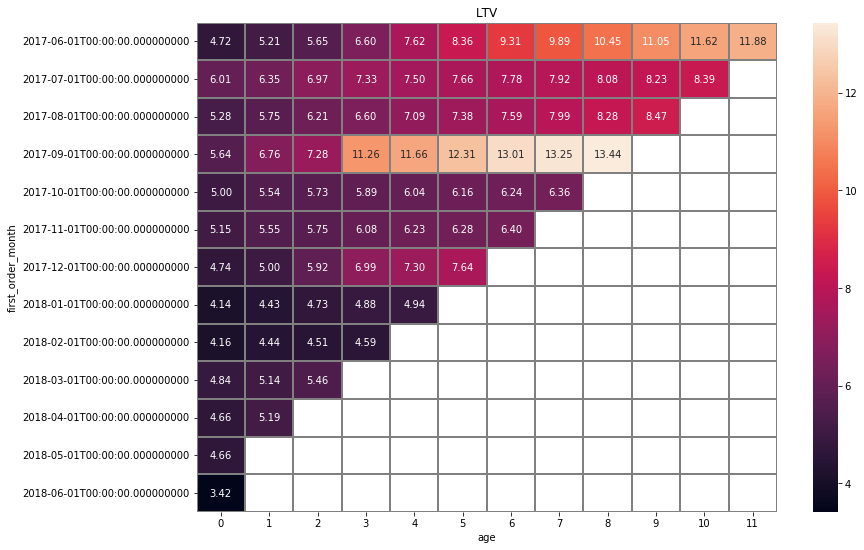

In [58]:
plt.figure(figsize = (13, 9))
plt.title('LTV')
sns.heatmap(
    result_ltv,
    annot = True,
    fmt = '.2f',
    linewidths = 1,
    linecolor = 'gray')

In [59]:
ltv_6 = result_ltv.mean()[5]
ltv_6

7.969052630207335

In [60]:
print('LTV = {:.2f}'.format(ltv_6))

LTV = 7.97


# Вывод

На тепловом графике видно, LTV увеличивается, что логично и должно происходить в здоровом бизнесе. С другой стороны, видно, что рост различается и видно, что рост LTV в первых когортах выше, чем рост у последних когорт. Тут несколько вариантов почему. 
Первый, что все зависит от времени года и если продолжать анализировать еще год, то может и вернутся опять к росту какой был у начальных когорт. 
Второй, что новые пользователи не сильно довольны программой, и используют другие платформы для покупки билетов.
В среднем за 6 месяцев жизни LTV будет равен 7,97.

<a id= 'eight'></a>
# 2.3. Маркетинговые метрики

# 2.3.1. Посчитать общую сумму расходов на маркетинг

In [61]:
sum_mark = costs['costs'].sum()
print('Общая сумма расходов на маркетинг составила:', sum_mark.round())
mean_mark = costs['costs'].mean()
print('В среднем человек обошелся:', mean_mark.round())

Общая сумма расходов на маркетинг составила: 329132.0
В среднем человек обошелся: 129.0


In [62]:
costs['month'] = costs['dt'].dt.month

In [63]:
costs_pivot_table = costs.pivot_table(index='source_id', columns='month', values='costs', aggfunc='sum')

In [64]:
costs_pivot_table

month,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,
1,2186.18,2204.48,1893.09,1327.49,1467.61,1125.61,1072.88,951.81,1502.01,2315.75,2445.16,2341.20
2,4157.74,4474.34,3943.14,2993.70,2689.44,2427.38,2333.11,1811.05,2985.66,4845.00,5247.68,4897.80
3,14808.78,14228.56,13080.85,9296.81,9411.42,7731.65,7674.37,6143.54,9963.55,15737.24,17025.34,16219.52
4,5832.79,5711.96,5961.87,4408.49,4214.21,3514.80,3529.73,3217.36,5192.26,6420.84,5388.82,7680.47
5,5371.52,5071.31,4529.62,3501.15,3669.56,2616.12,2998.14,2185.28,3849.14,5767.40,6325.34,5872.52
9,547.16,551.50,480.29,373.49,362.17,285.22,302.54,248.93,415.62,609.41,683.18,657.98
10,614.35,480.88,526.41,388.25,409.86,314.22,329.82,232.57,460.67,627.24,792.36,645.86


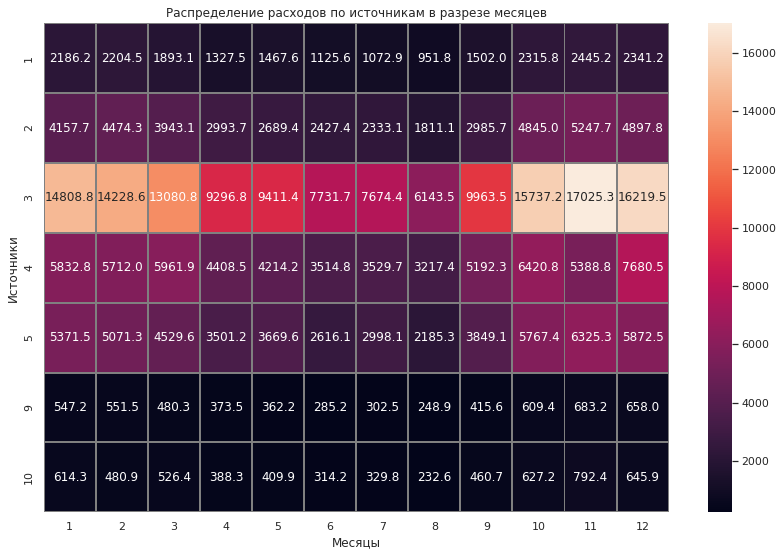

In [65]:
sns.set(style='white')
plt.figure(figsize = (14, 9))
sns.heatmap(costs_pivot_table, annot=True, fmt='.1f', linewidths=1, linecolor='gray')
plt.title('Распределение расходов по источникам в разрезе месяцев')
plt.xlabel('Месяцы')
plt.ylabel('Источники')
plt.show()


In [66]:
costs

,source_id,dt,costs,month
0,1,2017-06-01,75.20,6
1,1,2017-06-02,62.25,6
2,1,2017-06-03,36.53,6
3,1,2017-06-04,55.00,6
4,1,2017-06-05,57.08,6
...,...,...,...,...
2537,10,2018-05-27,9.92,5
2538,10,2018-05-28,21.26,5
2539,10,2018-05-29,11.32,5
2540,10,2018-05-30,33.15,5


<Figure size 1080x1080 with 0 Axes>

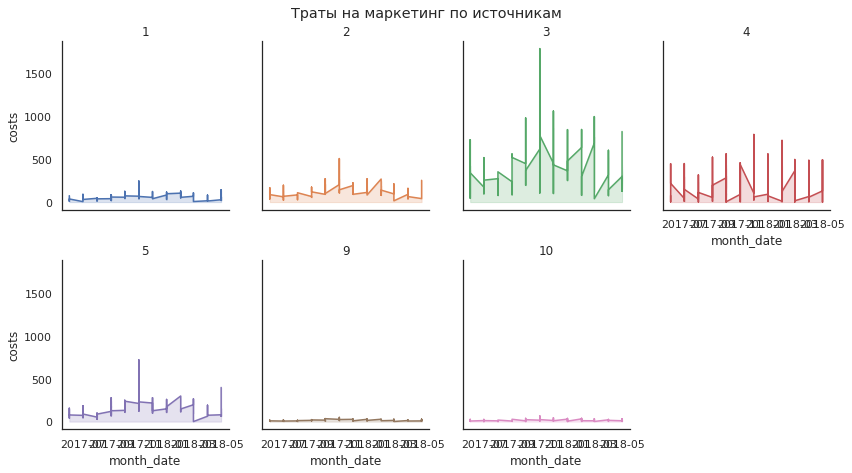

In [67]:
costs['month_date'] = costs['dt'].astype('datetime64[M]')
сosts = costs.drop(['month'], axis = 1)
plt.figure(figsize = (15, 15))

g = sns.FacetGrid(costs, col='source_id', hue='source_id', col_wrap=4)
g = g.map(plt.plot, 'month_date', 'costs')
g = g.map(plt.fill_between, 'month_date', 'costs', alpha=0.2).set_titles("{col_name} source_id")
g = g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9, hspace = 0.3, wspace = 0.2, bottom = 0.001)
g = g.fig.suptitle('Траты на маркетинг по источникам')
plt.show()

In [68]:
costs_2 = costs.pivot_table(index = 'month_date', columns = 'source_id', values = 'costs', aggfunc = 'mean')

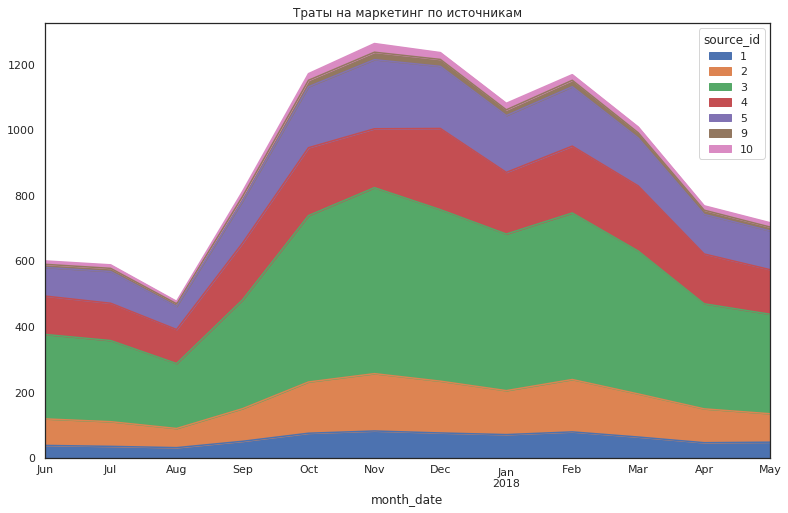

In [69]:
costs_2.plot(kind = 'area', title = 'Траты на маркетинг по источникам', figsize=(13, 8))

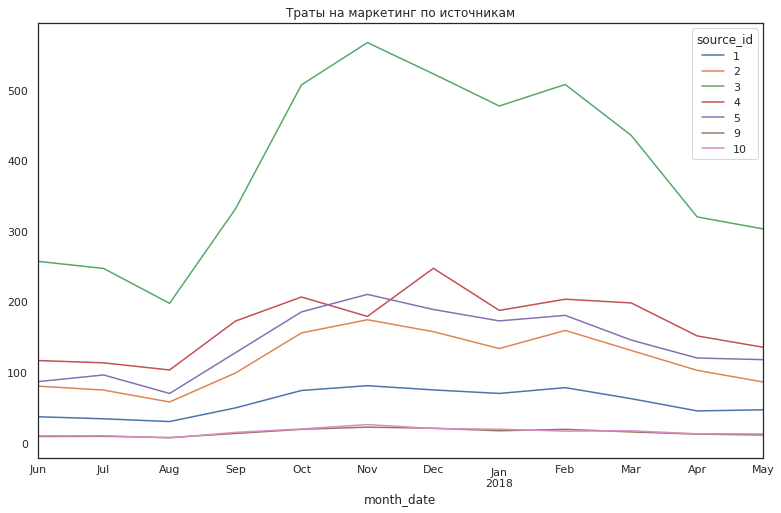

In [70]:
costs_2.plot(title = 'Траты на маркетинг по источникам', figsize=(13, 8))

# Вывод

На графике хорошо видно, что на 3ий тип источника уходит больше всего средств. Общая сумма расходов составила 329132, а в среднем на пользователя 129. 9 и 10 источник траться не много денег на них. 2, 4, 5 примерно одниковые расходы.

# 2.3.2. Рассчитать средний CAC на одного покупателя 

In [71]:
monthly_sum = costs.groupby(['source_id'])['costs'].sum()

In [72]:
start_visit = visits.sort_values(by = ['Uid', 'Start Ts']).groupby(['Uid', 'start_month']).agg({'Source Id': 'first', 'Device': 'first'}).reset_index()

In [73]:
start_visit

,Uid,start_month,Source Id,Device
0,11863502262781,3,3,touch
1,49537067089222,2,2,touch
2,297729379853735,6,3,desktop
3,313578113262317,2,2,desktop
4,313578113262317,3,2,desktop
...,...,...,...,...
278736,18446424184725333426,12,4,touch
278737,18446556406699109058,1,3,touch
278738,18446621818809592527,5,4,desktop
278739,18446621818809592527,12,4,desktop


In [74]:
buyers = start_visit.query('Uid in @orders.Uid')

In [75]:
buyers = buyers.groupby(['Source Id']).agg({'Uid' : 'nunique'})

In [76]:
buyers

,Uid
Source Id,
1,4104
2,5500
3,12517
4,12815
5,8386
7,1
9,2325
10,1570


In [77]:
report = buyers.join(monthly_sum)

In [78]:
report['cac'] = report['costs'] / report['Uid']

In [79]:
report

,Uid,costs,cac
Source Id,,,
1,4104,20833.27,5.076333
2,5500,42806.04,7.782916
3,12517,141321.63,11.290375
4,12815,61073.60,4.765790
5,8386,51757.10,6.171846
7,1,NaN,NaN
9,2325,5517.49,2.373114
10,1570,5822.49,3.708592


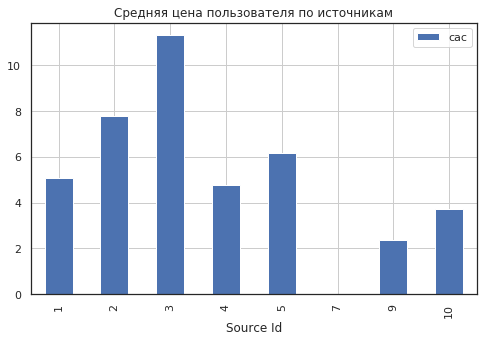

In [80]:
report.plot( y = 'cac', kind = 'bar', title = 'Средняя цена пользователя по источникам', figsize = (8, 5), grid = True)

In [81]:


source_costs = costs.groupby('month_date').agg({'costs' : 'sum'}).reset_index()
cohort_sizes['first_order_month'] = cohort_sizes['first_order_month'].astype('datetime64[M]')
    
cohort_sizes = cohort_sizes.sort_values(by = 'first_order_month', ascending = True)
cohort_sizes = cohort_sizes.reset_index(drop = True)
source_costs = pd.merge(source_costs, cohort_sizes, left_on='month_date', right_on='first_order_month')
source_costs = source_costs.set_index(['first_order_month'])
source_costs['cac'] = source_costs['costs'] / source_costs['n_buyers']

In [82]:
source_costs

,month_date,costs,n_buyers,cac
first_order_month,,,,
2017-06-01,2017-06-01,18015.00,2023,8.905091
2017-07-01,2017-07-01,18240.59,1923,9.485486
2017-08-01,2017-08-01,14790.54,1370,10.796015
2017-09-01,2017-09-01,24368.91,2581,9.441654
2017-10-01,2017-10-01,36322.88,4340,8.369327
2017-11-01,2017-11-01,37907.88,4081,9.288870
2017-12-01,2017-12-01,38315.35,4383,8.741809
2018-01-01,2018-01-01,33518.52,3373,9.937302
2018-02-01,2018-02-01,32723.03,3651,8.962758


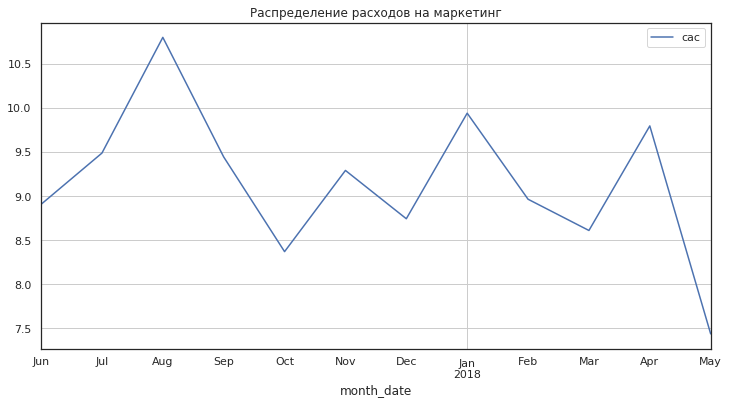

In [83]:
source_costs.plot.line(x = 'month_date', y = 'cac', title = 'Распределение расходов на маркетинг', figsize = (12, 6), grid = True)

In [84]:
cac_mean = source_costs['cac'].mean()
print('Средний CAC для всех источников = {:.2f}'.format(cac_mean)) 

Средний CAC для всех источников = 9.15


In [85]:
visits.rename(columns = {'Source Id':'source_id'}, inplace = True)
users = visits.sort_values(by = ['Uid', 'Start Ts']).groupby('Uid').agg({'source_id': 'first', 'start_date': 'first'})

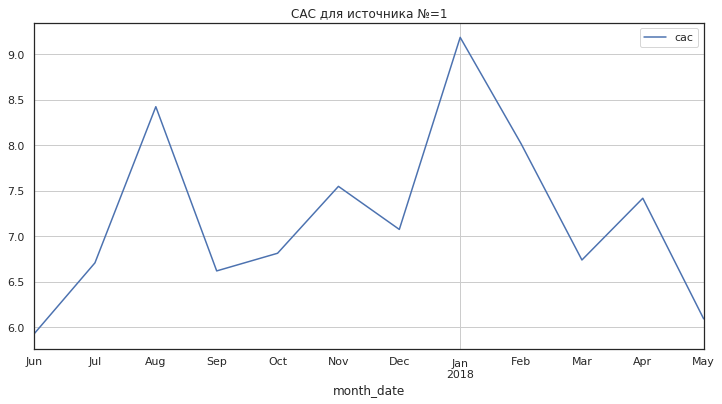

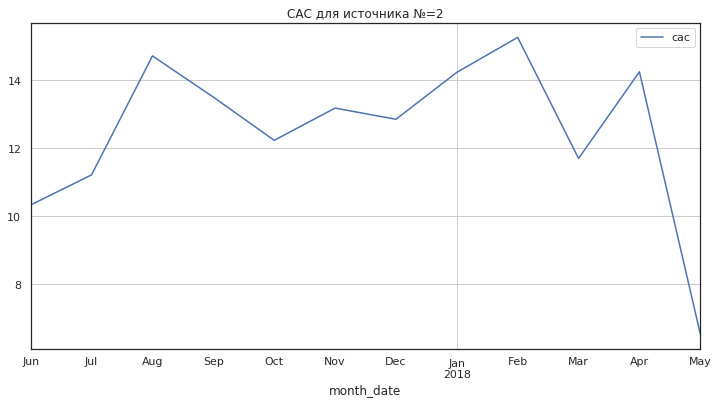

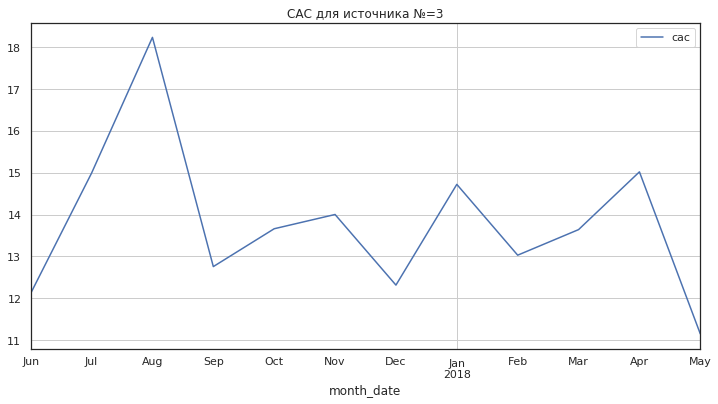

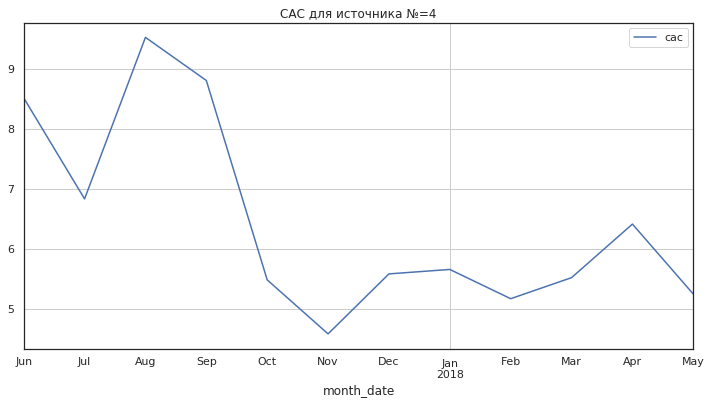

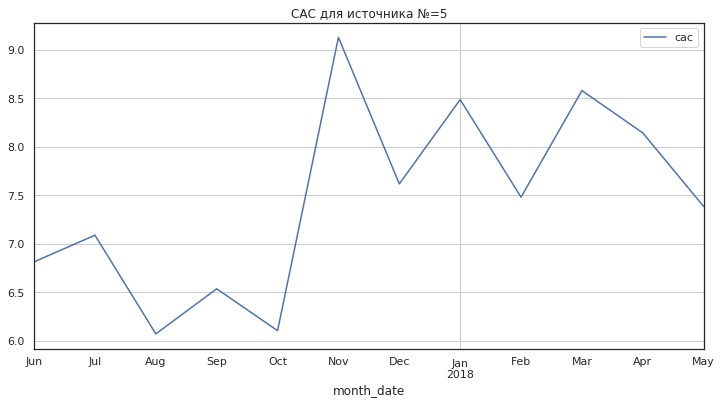

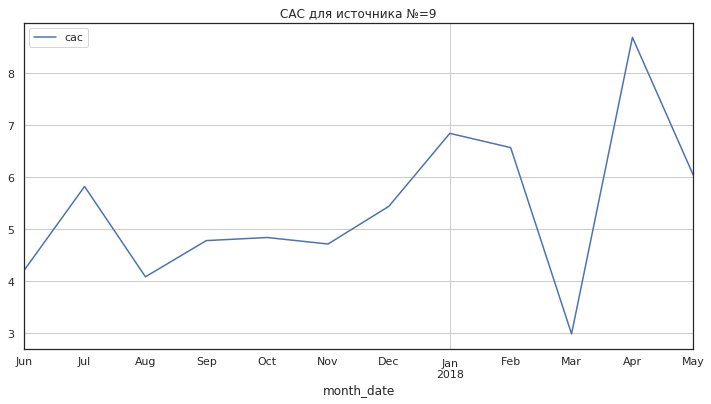

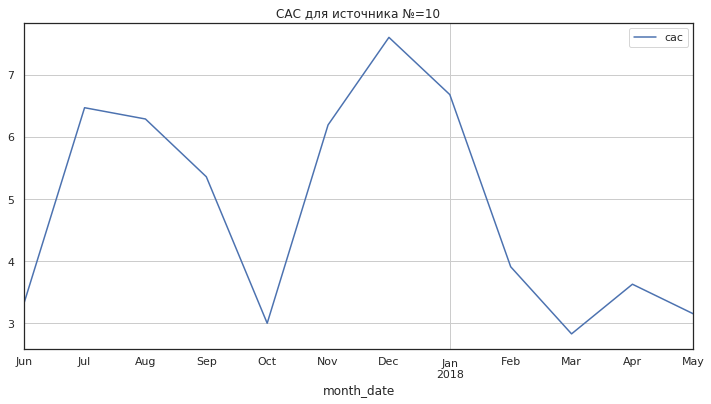

In [86]:
for source in [1, 2, 3, 4, 5, 9, 10]:

    source_visits = users.query('source_id == @source').index.values
    source_orders = orders.query('Uid in @source_visits')
    # делим на когорты
    cohort_sizes = (source_orders.groupby('first_order_month').agg({'Uid':'nunique'}).reset_index())
    cohort_sizes.columns = ['first_order_month','n_buyers']
    cohorts = (source_orders.groupby(['first_order_month','order_month']).agg({'Revenue':'sum'}).reset_index())
    report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
    # считаем CAC для нужного источника
    costs['month_date'] = costs['dt'].astype('datetime64[M]')
    сosts = costs.drop(['month'], axis = 1)
    source_costs = costs.query('source_id == @source')
    source_costs = source_costs.groupby('month_date').agg({'costs' : 'sum'}).reset_index()
    cohort_sizes['first_order_month'] = cohort_sizes['first_order_month'].astype('datetime64[M]')
    cohort_sizes = cohort_sizes.sort_values(by = 'first_order_month', ascending = True)
    cohort_sizes = cohort_sizes.reset_index(drop = True)
    source_costs = pd.merge(source_costs, cohort_sizes, left_on='month_date', right_on='first_order_month')
    source_costs = source_costs.set_index(['first_order_month'])
    source_costs['cac'] = source_costs['costs'] / source_costs['n_buyers']
    # строим графики по каждому источнику
    source_costs.plot.line(x = 'month_date', y = 'cac', title = 'CAC для источника №={}'.format(source), figsize = (12, 6), grid = True)

In [87]:
group_dimensions = ['month_date', 'source_id']
#visits = visits.rename(columns={'first_activity_month': 'first_order_month'}) 
visit_orders = pd.merge(visits, orders, on='Uid')
monthly_costs_source = costs.groupby(group_dimensions)['costs'].sum()
users_2 = visit_orders.sort_values(by = ['Uid', 'Start Ts']).groupby('Uid').agg({'source_id' : 'first', 'first_order_month' : 'first'})
users_2 = users_2.reset_index().rename(columns = {'first_order_month' : 'month_date'})

buyers_2 = users_2.query('Uid in @orders.Uid')
buyers_2 = buyers_2.groupby(group_dimensions).agg({'Uid' : 'nunique'})

report_2 = buyers_2.join(monthly_costs_source)
report_2['cost_per_buyer'] = report_2['costs'] / report_2['Uid']
report_2


Uid    costs  cost_per_buyer
month_date source_id                              
2017-06-01 1          190  1125.61        5.924263
           2          235  2427.38       10.329277
           3          638  7731.65       12.118574
           4          413  3514.80        8.510412
           5          384  2616.12        6.812813
...                   ...      ...             ...
2018-05-01 4          804  4214.21        5.241555
           5          497  3669.56        7.383421
           9           60   362.17        6.036167
           10         130   409.86        3.152769
2018-06-01 4            1      NaN             NaN

[86 rows x 3 columns]

In [88]:
display(users_2)
display(orders)

,Uid,source_id,month_date
0,313578113262317,2,2018-01-01
1,1575281904278712,10,2017-06-01
2,2429014661409475,3,2017-10-01
3,2464366381792757,5,2018-01-01
4,2551852515556206,5,2017-11-01
...,...,...,...
36518,18445147675727495770,5,2017-11-01
36519,18445407535914413204,3,2017-09-01
36520,18445601152732270159,2,2018-03-01
36521,18446156210226471712,3,2018-02-01


,Buy Ts,Revenue,Uid,order_month,first_order_month
0,2017-06-01,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01,0.37,14200605875248379450,2017-06-01,2017-06-01
...,...,...,...,...,...
50410,2018-05-01,4.64,12296626599487328624,2018-05-01,2018-05-01
50411,2018-05-01,5.80,11369640365507475976,2018-05-01,2018-05-01
50412,2018-05-01,0.30,1786462140797698849,2018-05-01,2018-05-01
50413,2018-05-01,3.67,3993697860786194247,2018-05-01,2018-05-01


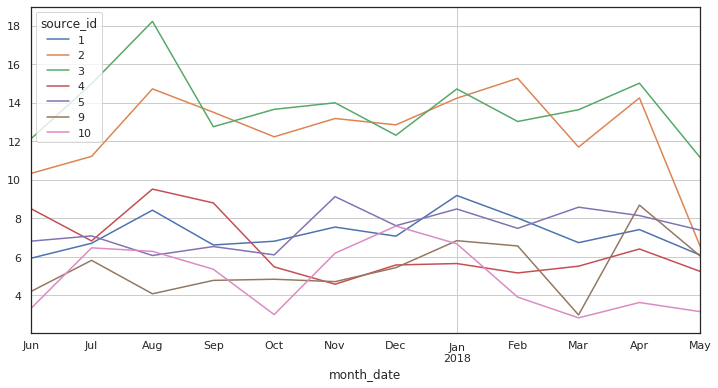

In [89]:
report_2.pivot_table(index = 'month_date', columns = 'source_id', values = 'cost_per_buyer', aggfunc = 'mean').plot(figsize = (12, 6), grid = True)


# Вывод

Посчитав показатель CAC, можно увидеть, что 3ий является самым дорогим, хотя и не является самым эффективным. Четвертый источник больше привлек людей, но оказался чуть ли не в два раза дешевле. 
На графике, видно, что один пик расхода в августе, когда и перед новым годом. Эти пики коррелируют с моментами роста продаж и посещаемостью сайти. В среднем пользователь стоит 4.87.

# 2.3.3. Рассчитать ROMI по когортам в разрезе источников.

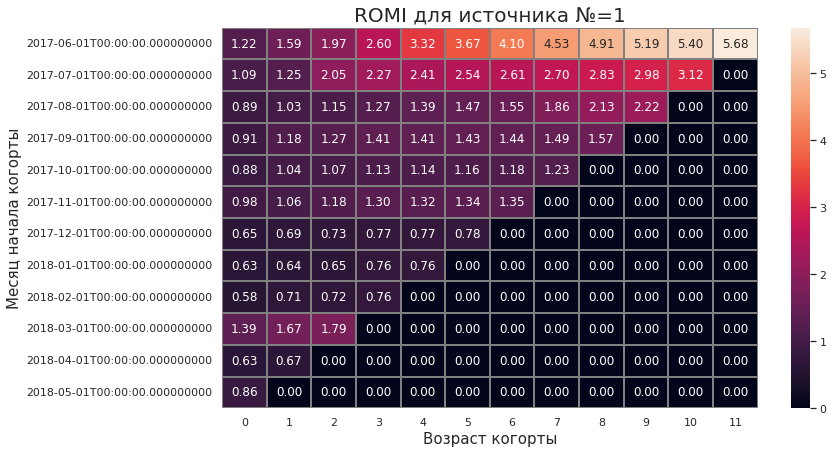

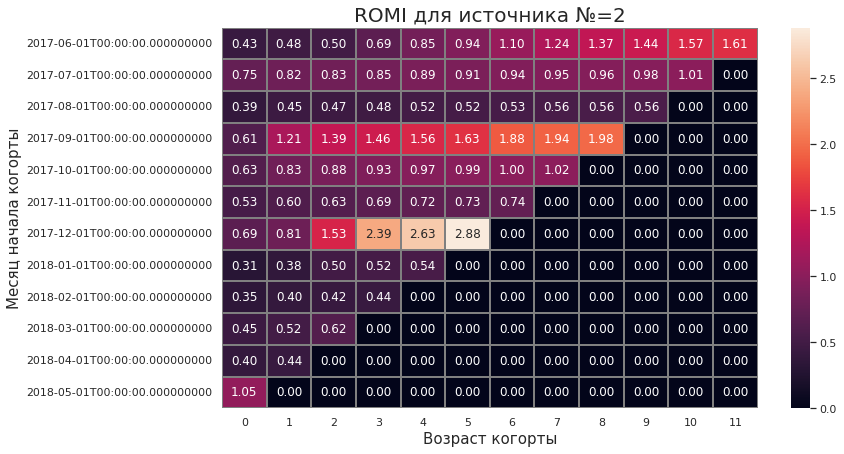

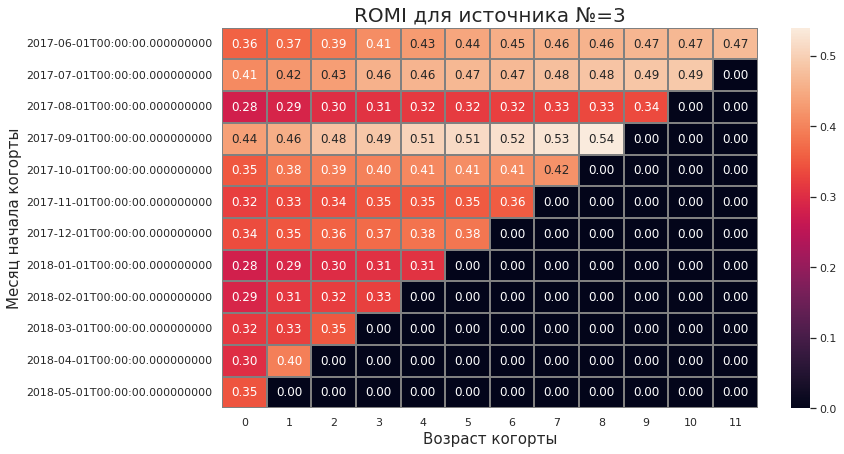

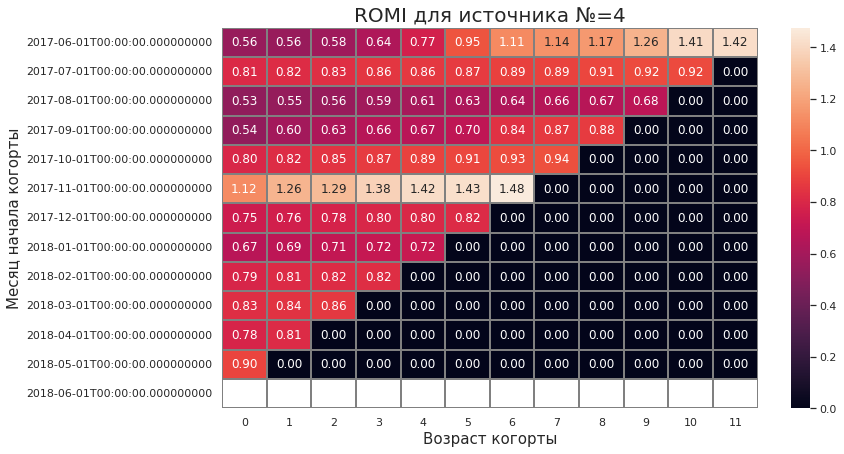

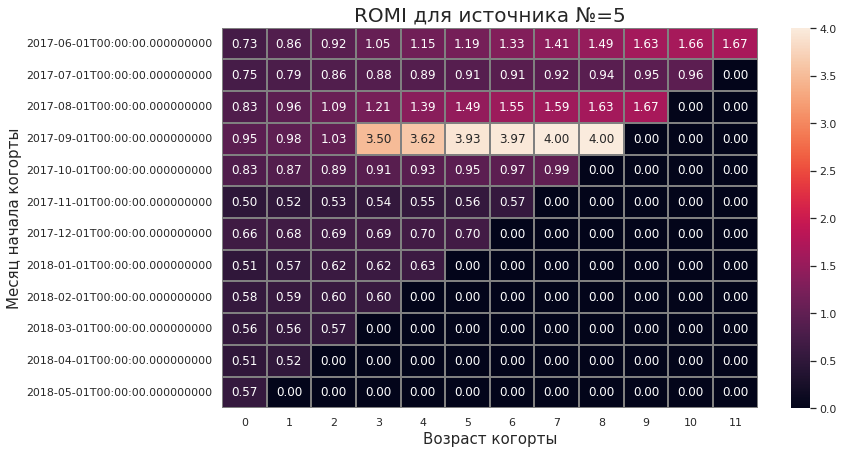

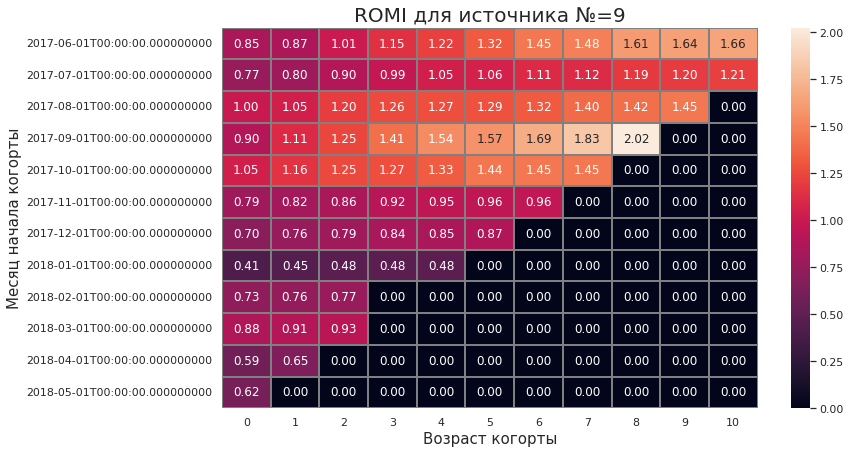

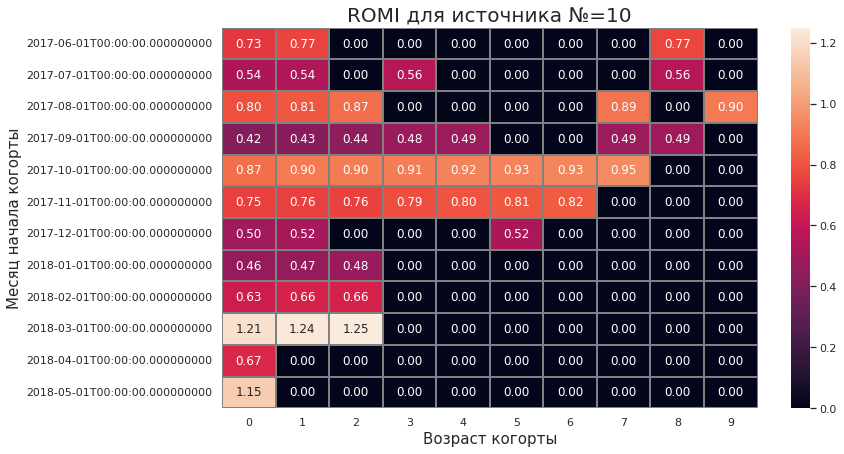

In [90]:
for source in [1, 2, 3, 4, 5, 9, 10]:

    source_visits = users.query('source_id == @source').index.values
    source_orders = orders.query('Uid in @source_visits')
    # делим на когорты
    cohort_sizes = (source_orders.groupby('first_order_month').agg({'Uid':'nunique'}).reset_index())
    cohort_sizes.columns = ['first_order_month','n_buyers']
    cohorts = (source_orders.groupby(['first_order_month','order_month']).agg({'Revenue':'sum'}).reset_index())
    report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
    # считаем LTV
    margin_rate = 1.0
    report['gp'] =  report['Revenue'] * margin_rate
    report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
    report['age'] = report['age'].round().astype('int')
    report['ltv'] = report['gp'] / report['n_buyers']
    result = report.pivot_table(
        index='first_order_month', columns='age', values='ltv', aggfunc='mean'
        )
    result = result.cumsum(axis=1).fillna(0)
    
    # считаем CAC для нужного источника
    costs['month_date'] = costs['dt'].astype('datetime64[M]')
    сosts = costs.drop(['month'], axis = 1)
    source_costs = costs.query('source_id == @source')

    source_costs = source_costs.groupby('month_date').agg({'costs' : 'sum'}).reset_index()
    cohort_sizes['first_order_month'] = cohort_sizes['first_order_month'].astype('datetime64[M]')
    
    cohort_sizes = cohort_sizes.sort_values(by = 'first_order_month', ascending = True)
    cohort_sizes = cohort_sizes.reset_index(drop = True)
    source_costs = pd.merge(source_costs, cohort_sizes, left_on='month_date', right_on='first_order_month')
    source_costs = source_costs.set_index(['first_order_month'])
    source_costs['cac'] = source_costs['costs'] / source_costs['n_buyers']
    
    # Считаем ROMI
    result_total = result.div(source_costs['cac'],axis =0 )
    sns.set(style='white')
    plt.figure(figsize=(12, 7))
    sns.heatmap(data=result_total, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
    plt.ylabel('Месяц начала когорты', fontsize = 15)
    plt.xlabel('Возраст когорты', fontsize = 15) 
    plt.title('ROMI для источника №={}'.format(source), fontsize = 20)

# Вывод

Из графиков можно увидеть, что не все пользователи окупаются, приходя из источников. Особенно с третьего источника, он много приводит людей, но реклама не отбивается. 1,4,9 источники точно окупаются, а вот 2 и 5 источники иногда окупается в несколько раз, а иногда не окупается. Нужно провести дополнительное исследование в этом источнике, может зависит от сезона и стоит в какой промежуток времени вкладывать больше в этот источник, а в какой-то момент минимально, так можно будет увеличить эффективность вкладываемых средств. По 10 источнику не понятно, не хватает данных для более подробного анализа.

<a id= 'three'></a>
# Шаг 3. Сформулировать выводы и рекомендации

Подводя итоги проекта, можно делать следующие выводы, что четвертый источник является самым оптимальным, из всех других. Это связано с тем, что стоимость привлечение одного клиента низкая, по сравнению с тем же третьим источником, но приносит он больше всех клиентов. С точки зрение окупаемости, четвертый источник, он не самый хороший. Он может окупать рекламу, но не всегда и зависит от когорты. Для привлечения внимания на сайт он лучше подойдет, чем тот же третий источник. В плане окупаемости, лучше всего подходит первый источник, он не так много приносит трафика, но клиенты не однократно окупаются. Теперь проблемы с источниками, разработчиками нужно обратить внимание на источники 6, 7, 8, 10. Первые три отсутствуют в вообще, или значение совсем маленькие. Нужно понять, нужны ли это источники в принципе, и может от них вовсе отказаться. Источник 10, не дорогой, но данные отсутствуют и сложно сделать какие конкретные выводы. Считаю, что нужно отметить просадок к лету, и резкий скачок к зиме. С одной стороны, из-за отсутствия большое количество репертуаров и самих людей в городе, падает спрос на приложение, таким образом можно предположить, что необходимо уменьшить затраты на маркетинг в этот период. С другой стороны, можно проследить тренд, что пользователь зарегистрировавшиеся летом, окупаются. Другими словами, новые клиенты с лета охотней пользуются приложением в течении года, и часто именно они окупаются.

[Наверх](#five)<a id= 'four'></a>